# \#1: Sun-Jupiter Example Solution

# Data we will need
mass of Jupiter = 1.898 × 10^27 kg

dist Jupiter to the Sun 778600627.2km

orbital period 12 years

sun rotation period = 25 days

jupiter rotation period = 10 hours


In [1]:
import phoebe
from phoebe import u,c

In [2]:
logger = phoebe.logger(clevel='WARNING')

In [3]:
b = phoebe.default_binary()

In [4]:
# we are going to need to set 3 periods.  1 orbital and 2 rotation

In [5]:
print( b.filter(qualifier='period') )

ParameterSet: 5 parameters
C        period@primary@component: 1.0 d
C      period@secondary@component: 1.0 d
          period@binary@component: 1.0 d
        period@primary@constraint: {period@binary@component} / {syncpar@primary@component}
      period@secondary@constraint: {period@binary@component} / {syncpar@secondary@component}


In [6]:
b.flip_constraint(qualifier='period', component='secondary', solve_for='syncpar@secondary')

<ConstraintParameter: {syncpar@secondary@component} = {period@binary@component} / {period@secondary@component} (solar units) => 1.0>

In [7]:
 b.flip_constraint(qualifier='period', component='primary', solve_for='syncpar@primary')

<ConstraintParameter: {syncpar@primary@component} = {period@binary@component} / {period@primary@component} (solar units) => 1.0>

In [8]:
b.set_value('period@primary', 25)
b.set_value('period@secondary', 10, unit=u.hr)
b.set_value('period@binary', 12, unit=u.yr)

In [9]:
# now let's flip the constraints on the primary and secondary mass

In [10]:
b.flip_constraint(qualifier='mass', component='primary', solve_for='sma')

<ConstraintParameter: {sma@binary@component} = (((({mass@primary@component} * ({period@binary@component} ** 2.000000)) * ({q@binary@component} + 1.000000)) * 2942.206217504419328179210424423218) / 39.478418) ** (1./3) (solar units) => 5.299999999999999 solRad>

In [11]:
b.flip_constraint(qualifier='mass', component='secondary', solve_for='q')

<ConstraintParameter: {q@binary@component} = {mass@secondary@component} / {mass@primary@component} (solar units) => 1.0>

In [12]:
b.set_value('mass@primary', 1.0)
b.set_value('mass@secondary', 1.898e27, unit=u.kg)

In [13]:
# let's get the value of the sma for this orbit to see how close it is to Jupiter's orbital radius

In [14]:
b.get_value('sma@component@binary',  unit=u.km)

784354193.9984822

In [15]:
b.get_value('sma@component@secondary',  unit=u.km)

783606217.1240869

In [16]:
# add a dataset 12yrs*365days = 4380

In [17]:
b.add_dataset('lc', compute_times=phoebe.linspace(0,4380,101), dataset='lc01')
b.add_dataset('rv', compute_times=phoebe.linspace(0,4380,101), dataset='rv01')

<ParameterSet: 81 parameters | contexts: dataset, compute, constraint, figure>

In [18]:
# we'll get an error because we have not set the secondary radius and it's too big

In [19]:
b.run_compute()

Wed, 16 Jun 2021 23:15 BUNDLE       WARNING secondary is overflowing at periastron (requiv=1.0, requiv_max=0.1883607435868985).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


ValueError: failed to pass checks
Run Checks Report: FAIL
ERROR: secondary is overflowing at periastron (requiv=1.0, requiv_max=0.1883607435868985).  Use contact model if overflowing is desired. (3 affected parameters, affecting system,run_compute)

In [20]:
# let's set it so we don't have overflow

In [21]:
b.set_value('requiv@secondary', 69911, unit=u.km)

In [22]:
b.run_compute()

100%|██████████| 101/101 [00:01<00:00, 87.13it/s]


<ParameterSet: 7 parameters | kinds: lc, rv>

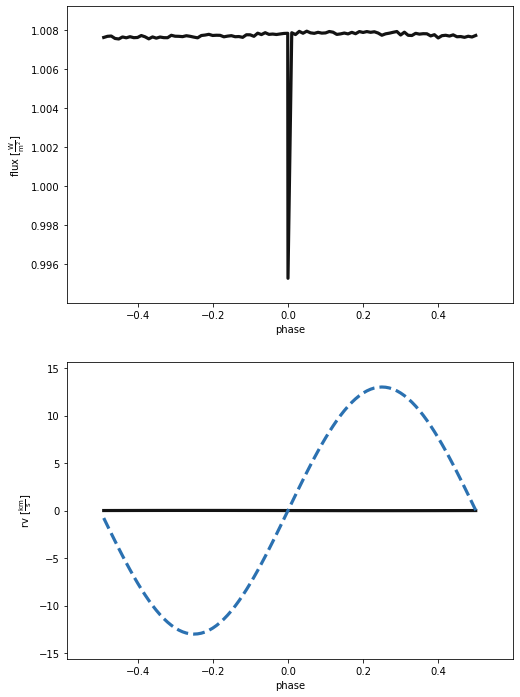

In [23]:
_ = b.plot(show=True, x='phase')